In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("dataset.csv")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.shape

(4521, 17)

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
train=pd.read_csv("train.csv")

In [10]:
test=pd.read_csv("test.csv")

In [13]:
# Check for missing values
missing_values = train.isnull().sum()
print("Missing values:\n", missing_values)

# Explore the dataset
print("\nDataset information:")
print(train.info())

Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 

### EDA

#### Distributions of Numerical Variables

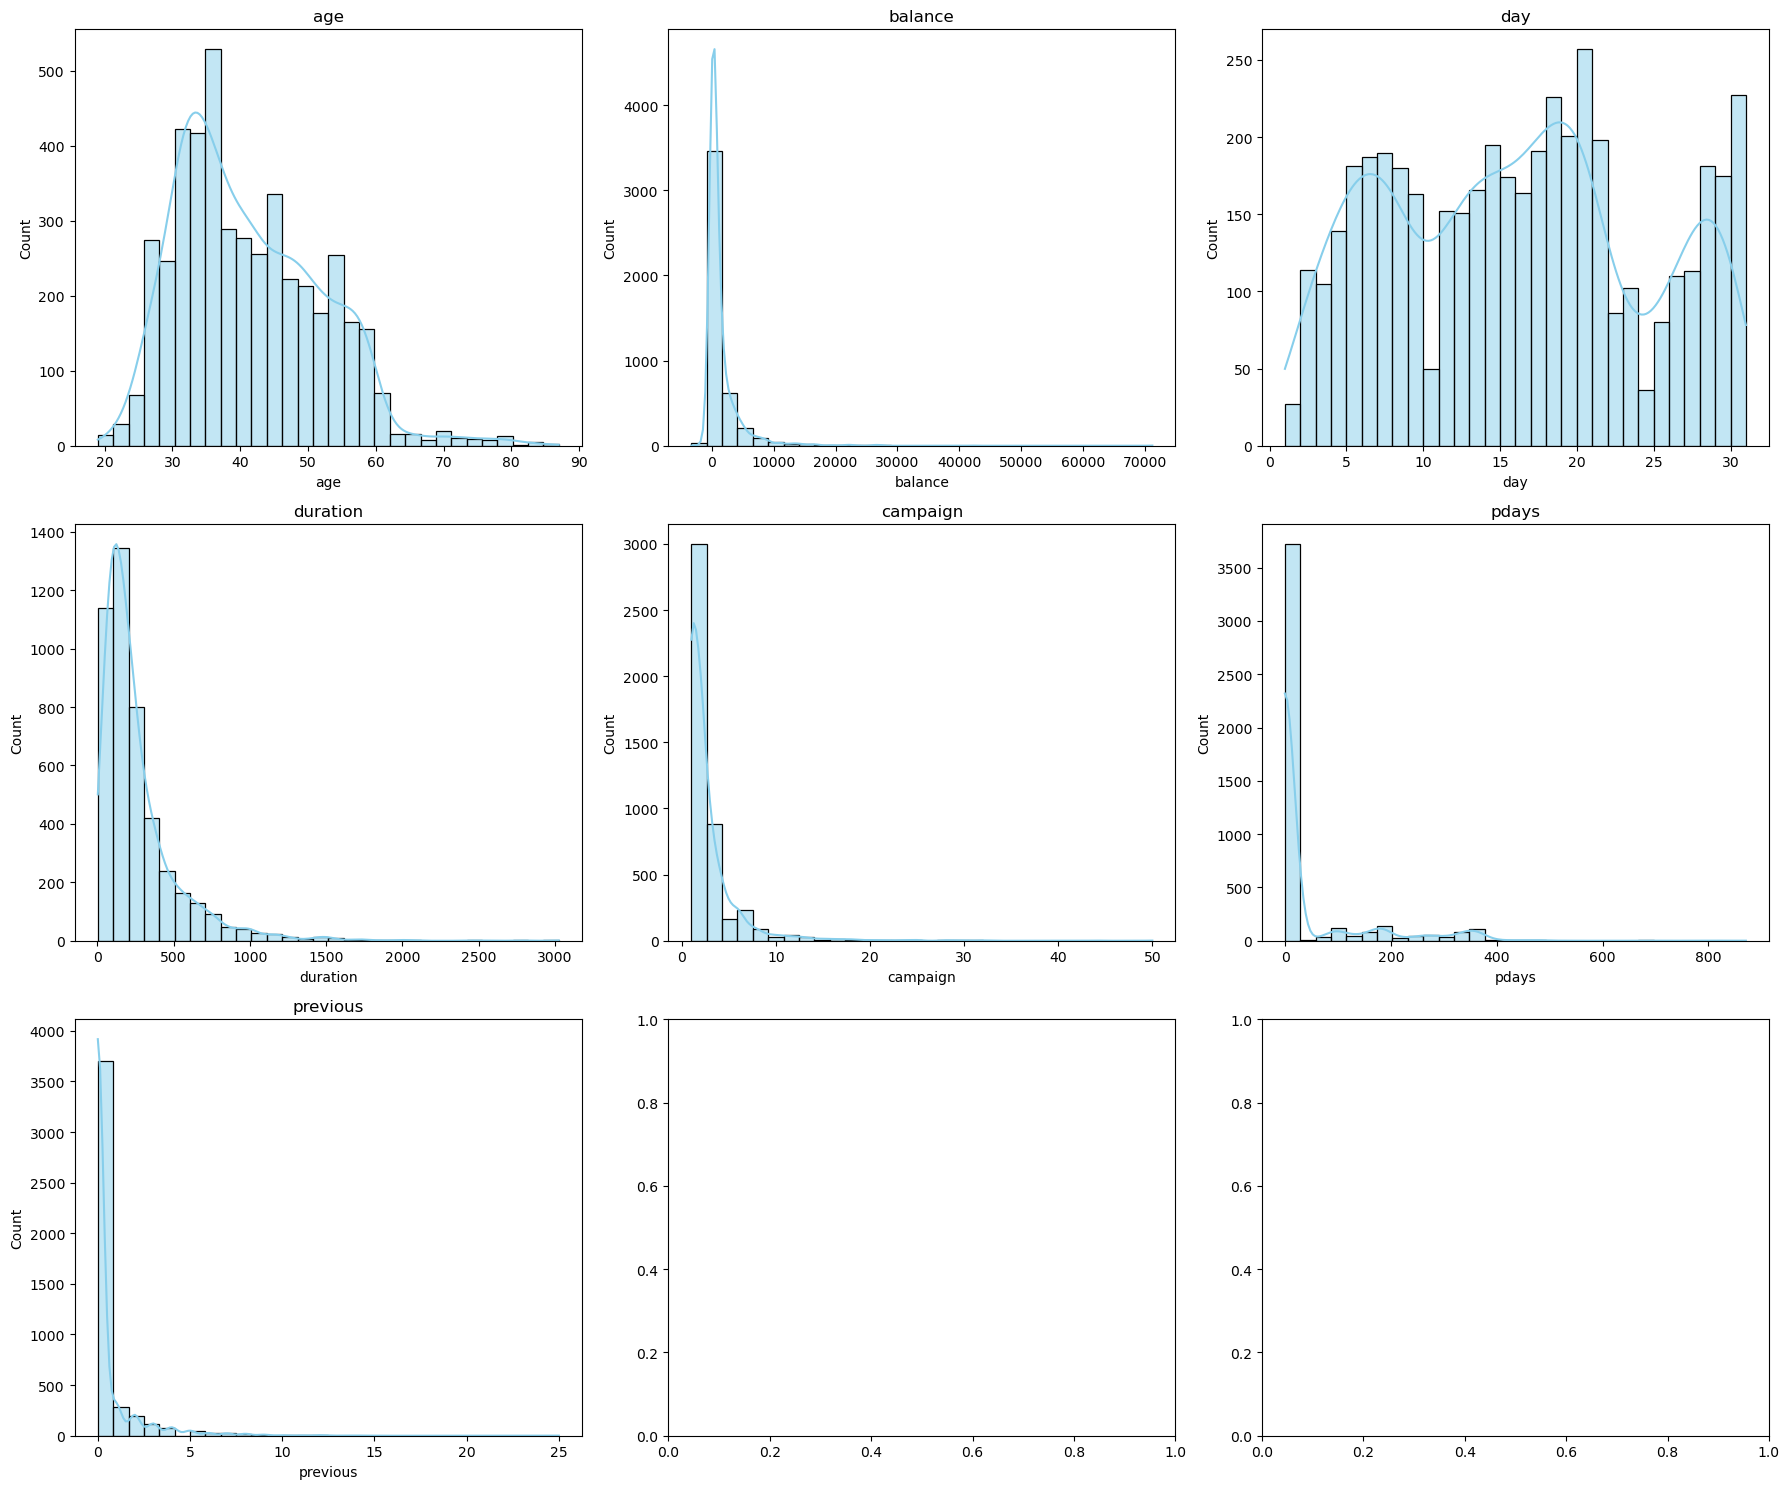

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for numerical variables
for i, column in enumerate(df.select_dtypes(include=['int64']).columns):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=30, color='skyblue')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#### Count Plots for Categorical Variables

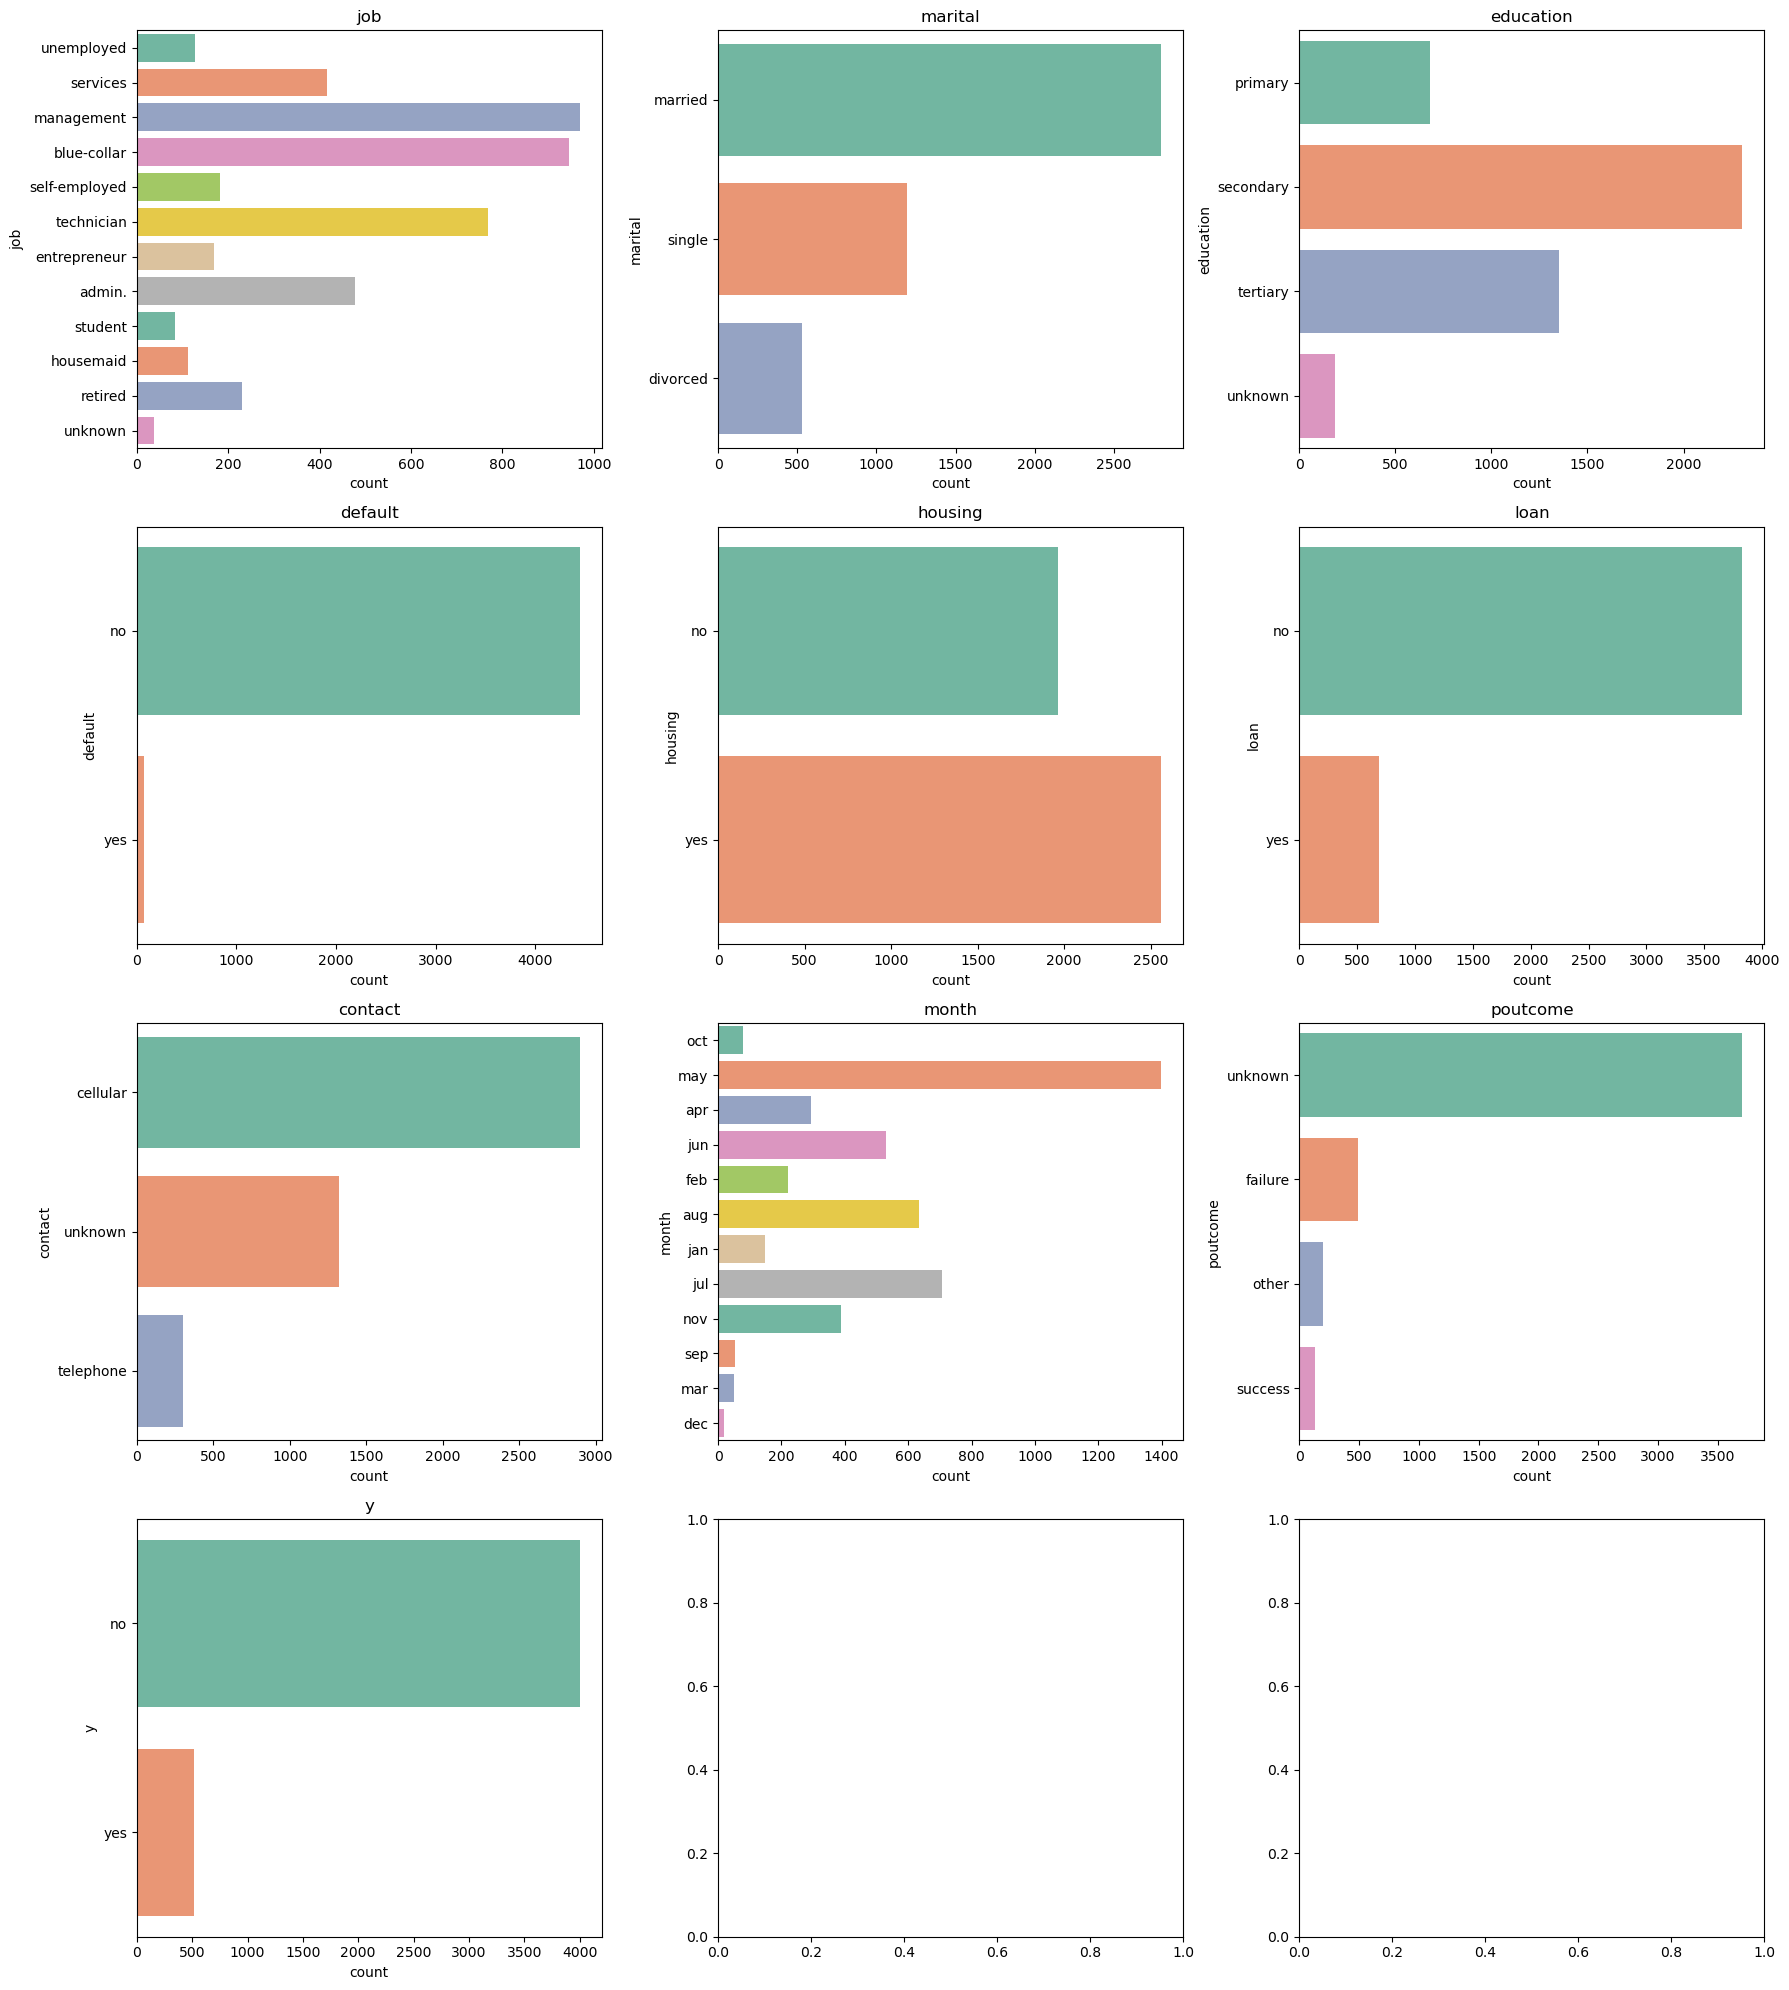

In [19]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot count plots for categorical variables
for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    sns.countplot(y=column, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#### Relationship with Target Variable

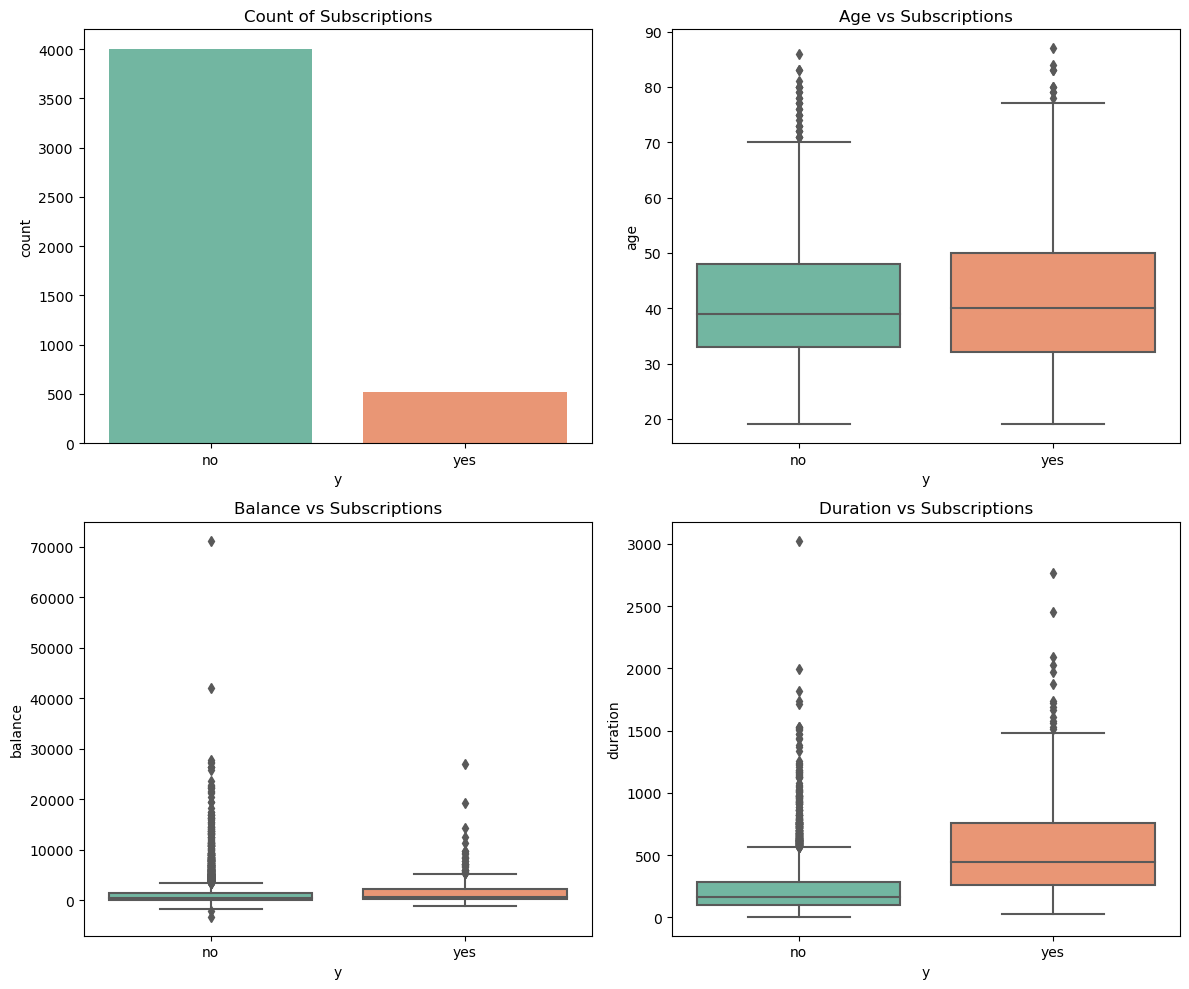

In [21]:
# Plot relationship with target variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.countplot(x='y', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Count of Subscriptions')

sns.boxplot(x='y', y='age', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Age vs Subscriptions')

sns.boxplot(x='y', y='balance', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Balance vs Subscriptions')

sns.boxplot(x='y', y='duration', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Duration vs Subscriptions')

# Adjust layout
plt.tight_layout()
plt.show()
